# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
rides_by_type = pyber_data_df.groupby("type").count()["ride_id"]

In [4]:
# 2. Get the total drivers for each city type
# Avoid adding the same city count multiple times
drivers_by_type_df = pyber_data_df.drop_duplicates(subset=["city"])
drivers_by_type = drivers_by_type_df.groupby("type").sum()["driver_count"]
drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
fares_by_type = pyber_data_df.groupby("type").sum()["fare"]
fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fares_by_type = pyber_data_df.groupby("type").mean()["fare"]

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = fares_by_type / drivers_by_type

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides" : rides_by_type,
                   "Total Drivers" : drivers_by_type,
                   "Total Fares" : fares_by_type,
                   "Average Fare per Ride" : avg_fares_by_type,
                   "Average Fare per Driver" : avg_fare_per_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

In [11]:
#print summary dataframe
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_pyber_data_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
date_pyber_data_df.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [13]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
date_pyber_data_df = date_pyber_data_df.reset_index()

In [37]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
pyber_data_df['date'] = pd.to_datetime(date_pyber_data_df['date'])
pivot_date_pyber_data_df = date_pyber_data_df.pivot('date', 'type', 'fare')
pivot_date_pyber_data_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [38]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
q1_2018_through_april_pivot_df = pivot_date_pyber_data_df.loc['2019-01-01':'2019-04-29']
q1_2018_through_april_pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [39]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
# This is setup before the pivot to facilitate .loc() function.
q1_2018_through_april_pivot_df.index = pd.to_datetime(q1_2018_through_april_pivot_df.index)

In [40]:
# 14. Check that the datatype for the index is datetime using df.info()
q1_2018_through_april_pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


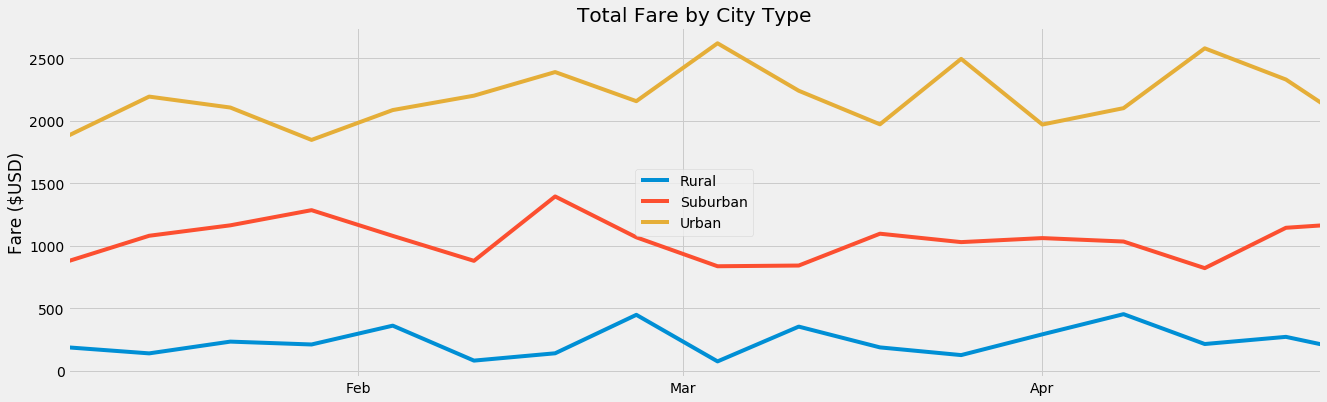

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib import style

# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_df = q1_2018_through_april_pivot_df.resample('W-mon').sum()

# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function.

plt.style.use('fivethirtyeight')

# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
plt.rcParams["figure.figsize"] = (20,6)

x_data = weekly_df.index
y_data = weekly_df.values
fig, ax = plt.subplots()
ax.plot(x_data, y_data)

plt.legend(["Rural", "Suburban", "Urban"], loc=0)

#formatting
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")

#https://matplotlib.org/gallery/text_labels_and_annotations/date.html
months = mdates.MonthLocator()
datemin = np.datetime64(x_data[0], 'D')
datemax = np.datetime64(x_data[-1], 'W')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(months)
ax.set_xlim(datemin, datemax)

# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

# Save the figure.
plt.savefig("Analysis/Fig1.png")
plt.show()